In [ ]:
pip install wooldridge

In [ ]:
pip install stargazer

# EJERCICIOS EN COMPUTADORA

In [3]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wooldridge import data
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## Problema 4

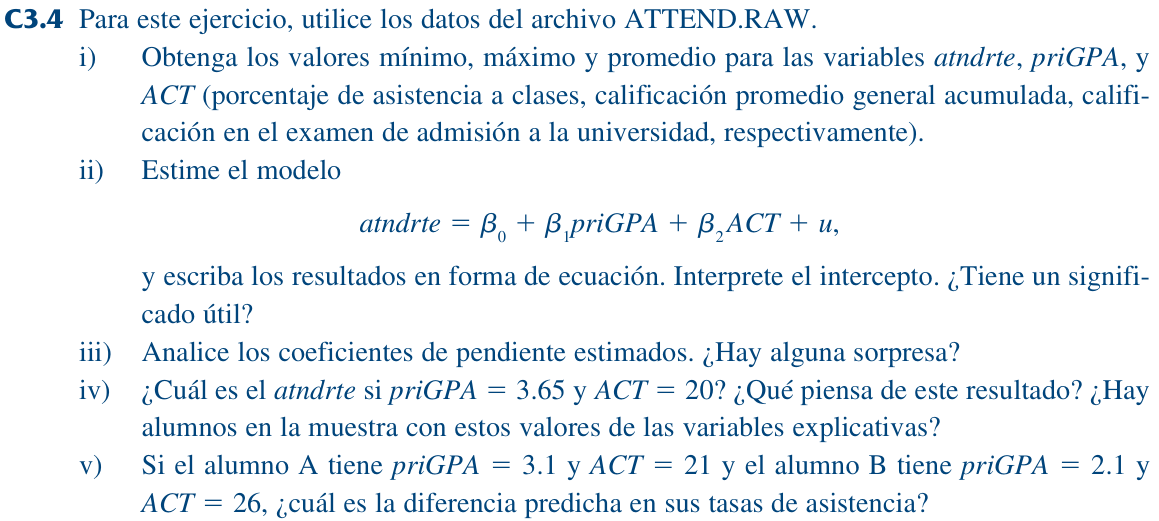

In [4]:
# Ejercicio C3.4
# Cargar los datos ATTEND.RAW
data_attend = data('attend')
data_attend.head()

,attend,termGPA,priGPA,ACT,final,atndrte,hwrte,frosh,soph,missed,stndfnl
0,27,3.19,2.64,23,28,84.375,100.0,0,1,5,0.472689
1,22,2.73,3.52,25,26,68.750,87.5,0,0,10,0.052521
2,30,3.00,2.46,24,30,93.750,87.5,0,0,2,0.892857
3,31,2.04,2.61,20,27,96.875,100.0,0,1,1,0.262605
4,32,3.68,3.32,23,34,100.000,100.0,0,1,0,1.733193


### Parte I

In [5]:
# Parte i: Valores mínimo, máximo y promedio de las variables solicitadas
data_attend[['atndrte','priGPA','ACT']].describe().T[['min','max','mean']]

,min,max,mean
atndrte,6.250,100.00,81.709559
priGPA,0.857,3.93,2.586775
ACT,13.000,32.00,22.510294


### Parte II

In [6]:
# Parte ii: Modelo de regresión
X = data_attend[['priGPA', 'ACT']]
X = sm.add_constant(X)
y = data_attend['atndrte']

model_attend = sm.OLS(y, X).fit()
intercepto = model_attend.params['const']
pendiente_priGPA = model_attend.params['priGPA']
pendiente_ACT = model_attend.params['ACT']
print(f"atndrte = {intercepto:.2f} + {pendiente_priGPA:.2f}.priGPA {pendiente_ACT:.2f}.ACT")
print(model_attend.summary())
print("El intercepto indica el porcentaje de asistencia predicho para un estudiante con priGPA y ACT")
print("iguales a cero. Aunque matemáticamente tiene sentido, no tiene un significado útil porque estos")
print("valores no son posibles en la realidad.")

atndrte = 75.70 + 17.26.priGPA -1.72.ACT
                            OLS Regression Results                            
Dep. Variable:                atndrte   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     138.7
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           3.39e-51
Time:                        00:31:08   Log-Likelihood:                -2776.1
No. Observations:                 680   AIC:                             5558.
Df Residuals:                     677   BIC:                             5572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

### Parte III

In [7]:
# Parte iii: Análisis de los coeficientes
print(f"Por cada punto de calificacion promedio el % de asistencia sube en {pendiente_priGPA:.2f}")
print(f"Por cada punto en el examen de ingreso el % de asistencia varia en {pendiente_ACT:.2f}")

Por cada punto de calificacion promedio el % de asistencia sube en 17.26
Por cada punto en el examen de ingreso el % de asistencia varia en -1.72


### Parte IV

In [8]:
# Parte iv: Predicción para priGPA = 3.65 y ACT = 20
prediccion_iv = intercepto + pendiente_priGPA * 3.65 + pendiente_ACT * 20
data_attend['fit'] = prediccion_iv

data_attend.query(" priGPA.round(2) == 3.65 and ACT.round(0) == 20")

,attend,termGPA,priGPA,ACT,final,atndrte,hwrte,frosh,soph,missed,stndfnl,fit
568,28,3.5,3.65,20,29,87.5,50.0,1,0,4,0.682773,104.370504


In [9]:
print(f"Se obtiene un pronostico de {104.37} el cual es irracional al tratarce de un (%)")

Se obtiene un pronostico de 104.37 el cual es irracional al tratarce de un (%)


### Parte V

In [10]:
# Parte v: Diferencia predicha entre alumno A y alumno B
priGPA_A, ACT_A = 3.1, 21
priGPA_B, ACT_B = 2.1, 26

prediccion_A = intercepto + pendiente_priGPA * priGPA_A + pendiente_ACT * ACT_A
prediccion_B = intercepto + pendiente_priGPA * priGPA_B + pendiente_ACT * ACT_B

diferencia_predicha = prediccion_A - prediccion_B

In [11]:
print("\nParte v: Diferencia predicha entre alumno A y alumno B")
print(f"Diferencia predicha: {diferencia_predicha:.2f}")


Parte v: Diferencia predicha entre alumno A y alumno B
Diferencia predicha: 25.84
